# Exploratory Data Analysis
"Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." - Jhon Tukey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set() # set the default style for the graphs 

### Graphical EDA <br>

<span style ="color:red"> Graphical reprsentation of the tabular data </span>

1. Histogram
2. Bee swarm Plot
3. Box plot
4. Scatter plot

In [3]:
# load the iris dtaaset from seaborn library
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
# The iris dataset has three different species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# Let's only evaluate the Versicolor species 
versicolor = iris[iris['species']=='versicolor'] # store the versicolor data in a seprate dataframe
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


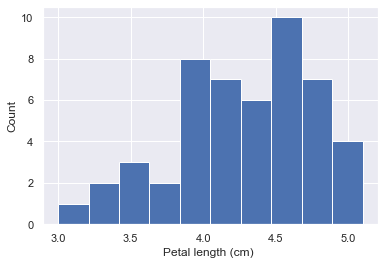

In [7]:
# Plotting a histogram
_ = plt.hist( x = 'petal_length', data = versicolor  ) # _ for dummy variable to stop from showing the different arrays created by hist function
_ = plt.xlabel("Petal length (cm) ") # always label the axes 
_ = plt.ylabel("Count")

<span style ="color:red"> 2.  Adjusting the number of bins in a histogram </span>
  -  Default of matplotlib is 10 bins 
  -  The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 
  - To specify the number of bins we can use the bins keyword argument of plt.hist().


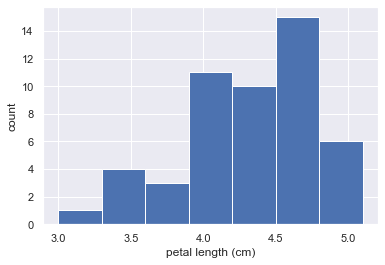

In [8]:
# Compute number of data points: n_data
n_data = len(versicolor.petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(x= "petal_length", bins = n_bins, data = versicolor)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

<span style = "color:red"> <b> Binning Bias </b> </span>  

- One **disadvantage** of histogram is the same data may be interpreted differently depending on choice of bins. To tackle that we can use the swarm plot. It repsents all the data points without a binning bias. 

<span style = "color:red"> <b> Bee swarm plot </b> </span> 
- Prerequisites for **bee swarm plot** using seaborn: The data be repsented as a pandas dataframe where each column is a feature and each row represents an observation.


In [9]:
# Bee swarm plot 
# name of the columns
iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

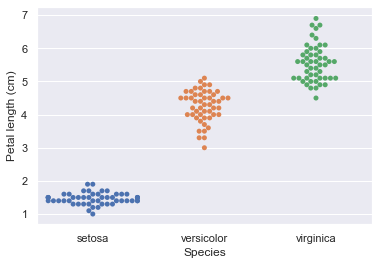

In [10]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
# Label the axes
_ = plt.xlabel('Species')
_ = plt.ylabel('Petal length (cm)')


We can conclude from the above plot that the petals of _I.virginica_ are tend to be longest and of _I.setosa_ tend to be shortest of the three species.  Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.

Problem with Bee swarm plot - it isnt very helpful for a large dataset as we will get edges with overlapping data points, which is necessacery in order to fit all points onto the plot. 

### <span style ="color:red"> ECDF plot</span>

Alternatively, we can compute **Empirical Cumulative Distribution Function(ECDF)**. It shows all the data and gives the complete picture of how the data are distributed.

In an ECDF plot,
- x-value is the quantity that we are measuring.
- y-value is the fraction of data points that have a value smaller than the corresponding x-value. 

To plot an ECDF 
- x- value - we sort the data.
- y-value - evenly spaced data points with a maximum of 1 genrated by np.arange function and divided by total number of data points.



In [11]:
# ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: The x-values are the sorted data stored in x
    x = np.sort(data)

    # y-data for the ECDF: The y data of the ECDF go from 1/n to 1 in equally spaced incrementsstored as y 
    #The end value in np.arange() is not inclusive. 
    #Therefore, np.arange() will need to go from 1 to n+1
    
    y = np.arange(1, n+1) / n
    return x, y

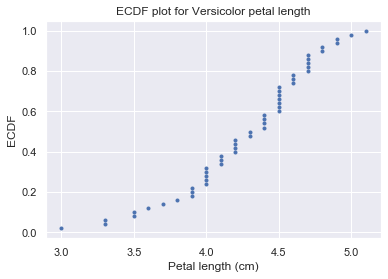

In [12]:
# Plotting the ECDF for versicolor

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor.petal_length)

# Generate plot
plt.plot(x_vers,y_vers, marker =".", linestyle = 'none')

# Label the axes

plt.xlabel("Petal length (cm)")
plt.ylabel("ECDF")
plt.title("ECDF plot for Versicolor petal length")

# Display the plot
plt.show()

Conclusion: Here we can see, 20% of _I.versicolor_ flowers have petals of less than 4 cm while 75% have petals smaller than or equal to 4.5 cm. 

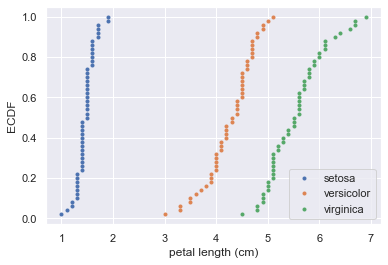

In [13]:
# Comparison of ECDFs 
# ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). 
# Here,we plot ECDFs for the petal lengths of all three iris species.

# Compute ECDFs
x_set, y_set = ecdf(iris[iris['species']=='setosa'].petal_length)
x_vers, y_vers = ecdf(versicolor.petal_length)
x_virg, y_virg = ecdf(iris[iris['species']=='virginica'].petal_length)



# Plot all ECDFs on the same plot

_ = plt.plot(x_set, y_set, marker =".", linestyle="none")
_ = plt.plot(x_vers, y_vers, marker =".", linestyle="none")
_ = plt.plot(x_virg, y_virg, marker =".", linestyle="none")

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

### Quantitative EDA

<span style = "color:red"> <b>Summary statistics </b></span> 
1. <b> Sample mean </b> : Sum of all the data divided by the number n of data points 
$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n x^i $$

  - Problem : heavily influenced by outliers . Instead use median.
2. <b> Sample median </b>: Calculated by sorting the data and choosing the datum in the middle. 
  - As it is derrived from the rank of the data and not from the value of the data, it is immune to extreme data points. 
  - The median is the 50th percentile of the data which means 50% of the data is below that value. 
  
3. <b> Percentiles </b>: We can get the 25th and 75th percetile which represents 25% or 75 % data are below that point respectively. 
  - A box plot represents the salient features of dataset usng percentiles. Invented by Jhon Tuckey. 
  - Middle line - 50th percentile, edges show 25th and 75th percentile.
  - Interquartile range (IQR) - The total height of the box whcih contains the middle 50% of the data
  - The whiskers extend to the distance of 1.5 times IQR or to the extent of data whichever is more extreme. 
  - outliers - all data points outside of whiskers are plotted as indivival points. A common criteria is if a data point is 2 * IQR away from the median, it is considered as an outlier. 
  > Not all outliers are erroneous data points and depends on the context.
  
  ![alt text](boxplot.png "Boxplot")
  [Image source](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-boxplots-5e2df7bcbd51&psig=AOvVaw1A1J5SjtUN18pfZPMRVb9z&ust=1599095150188000&source=images&cd=vfe&ved=2ahUKEwjO9LDko8nrAhVWg3IEHa0mCfwQjhx6BAgAEBI)
  
  - Advantage : Good representaion of large dataset with cluttered bee swarm plots.


In [14]:
# Compute the mean: mean_length_vers

mean_length_vers = np.mean(versicolor.petal_length)

# Print the result with some nice formatting
print('I. versicolor mean petal length :', mean_length_vers, 'cm')

I. versicolor mean petal length : 4.26 cm


In [15]:
# Computing percentiles

# Specify array of percentiles: percentiles
percentiles = np.array([25,50,75])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(a = versicolor.petal_length, q= percentiles)

# print the result
print(f"The percentile of petal lengths of I.versicolor flower are as follows: 25th = {ptiles_vers[0]} cm, 50th or median =  {ptiles_vers[1]} cm and 75th percentile = {ptiles_vers[2]} cm. ")

The percentile of petal lengths of I.versicolor flower are as follows: 25th = 4.0 cm, 50th or median =  4.35 cm and 75th percentile = 4.6 cm. 


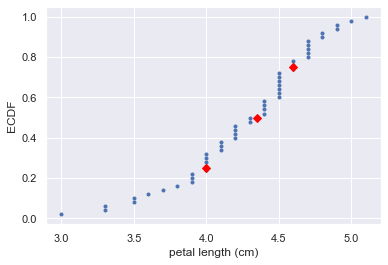

In [16]:
# Comparing percentiles to ECDF : To see how the percentiles relate to the ECDF,
# we will plot the percentiles of Iris versicolor petal lengths calculated above on the previously generated ECDF plot.
# To ensure the Y-axis of the ECDF plot remains between 0 and 1, we will rescale the percentiles array accordingly dividing it by 100.

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')



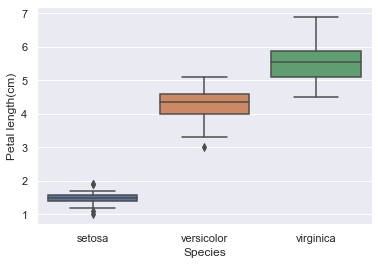

In [17]:
# Box-and-whisker plot : Although this is a small dataset and swarmplot is fine. 

# Create box plot with Seaborn's default settings
_ =sns.boxplot(x = 'species', y = 'petal_length',data = iris)

# Label the axes
_= plt.xlabel("Species")
_= plt.ylabel("Petal length(cm)")


<span style = "color:red"> <b>Summary statistics </b></span> 
4. <b> Variance </b> : The mean squared distance of the data from their mean.

$$ \sigma^2=\frac {\sum{{x_i - \bar{x}}^2}} {n-1} $$

$ \sigma^2 $ = sample variance  
$ x_i $ = the value of one observation  
$ \bar{x}$ = the mean value of all observations  
$ n $ = total number of observations

  - Informally, a measure of the spread of data.
  - As calculation of variance involves sqaured quantities, it doesn't have the same units of what we have measured. 

5.<b> Standard deviation </b>: Square root of variance 

$$ \sigma =\sqrt{\frac {\sum{{x_i - \bar{x}}^2}} {n-1}} $$

$ \sigma $ = sample standard deviation
  - Good representation of spread of data



  


In [18]:
# Computing the variance : Compute explicitly and then by using numpy.var() function

# Array of differences to mean: differences
differences = versicolor.petal_length - np.mean(versicolor.petal_length)

# Square the differences: diff_sq
diff_sq = differences **2

# Compute the mean square difference: variance_explicit

variance_explicit = np.mean(diff_sq) 

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor.petal_length)

# Print the results
print(f"Variance calculated explicitily = {variance_explicit: 0.4f}\nVariance calculated using NumPy ={variance_np: 0.4f}")



Variance calculated explicitily =  0.2164
Variance calculated using NumPy = 0.2164


In [19]:
# Computing the The standard deviation : From the variance and using the numpy.std() function
# Compute the variance: variance
variance = np.var(versicolor.petal_length)

# Print the square root of the variance
print(f"Std dev from variance = {np.sqrt(variance): 0.4f}")

# Print the standard deviation
print(f"Std dev using numpy = {np.std(versicolor.petal_length): 0.4f}")



Std dev from variance =  0.4652
Std dev using numpy =  0.4652


<span style= "color:red"><b> Covariance and the Pearson correlation coefficient </b></span>

5. <b> Covariance</b> :A measure of how two quantities vary together.
$$ covariance = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$
  - if x and y both tend to be above or below ther respective means together, then covariance is positive so they are positively correlated. When x is high, so is y and vice versa. 
  - if x is high when y is low, the covariance is negative, and the data are negatively or anticorrelated. 
  - having a large variance does not mean the covariance is large.
  - To determine a generally applicable measure of how to variables depend on each other, we need it to be dimensionsless (without any unit). Covariance is not unitless/ dimensionless. 
  
6. <b> Pearson Correlation coefficient </b>: Also called the Pearson r is covariance divided by standard deviations of the x and y variables.
$$ \rho = Pearson Correlation = \frac {covariance}{(\sigma_x)(\sigma_y)}  $$  
  - Denotes the variability due to codependence (the covariance) to the variability inherent to each variable independently (their standard deviations).
  - it is dimensionless and range from -1 (complete negative / anticorrelation) to 1 (complete positive correlation).
  - 0 shows no correlation at all. 
  - A good metric for correlation between two variables.
  - Easier to interpret than covariance. 
 
 
<span style= "color:red"><b> Scatter plot</b></span> 

  - This supplements the quantitaive EDA showing the correlation between two variables. 
  - to compare two properties of a single species

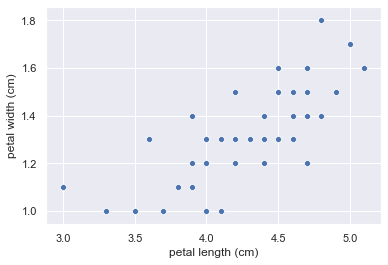

In [20]:
# Plot a scatter plot of the petal length and width measurements of I. versicolor flowers. 
# If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

_ = sns.scatterplot(versicolor.petal_length, versicolor.petal_width)

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

> Indeed, we see some correlation. Longer petals also tend to be wider.

In [21]:
# Computing the covariance
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor.petal_length,versicolor.petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print( petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


> Note that by symmetry, entry [1,0] is the same as entry [0,1].

In [22]:
#Computing the Pearson correlation coefficient

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor.petal_length, versicolor.petal_width)

# Print the result
print(r)

0.7866680885228169
